# Carga y Limpieza de Datos

In [1]:
# Importo paquetes

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X_train = pd.read_csv("./Data/train_comportamiento.csv")
X_test = pd.read_csv("./Data/test_comportamiento.csv")
y_train = pd.read_csv("./Data/y_train.csv", header=None)
y_test = pd.read_csv("./Data/y_test.csv", header=None)

In [3]:
y_train = y_train[0]
y_test = y_test[0]

In [4]:
X_train.drop(['Unnamed: 0', 'Unnamed: 0.1','Unnamed: 0.1.1', 'conversation_id', 'author', 'time', 'text', 'Label'], axis = 1, inplace = True)
X_test.drop(['Unnamed: 0', 'Unnamed: 0.1' ,'Unnamed: 0.1.1', 'conversation_id', 'author', 'time', 'text', 'Label'], axis = 1, inplace = True)

In [5]:
X_train

,message_line,char_count,word_count,word_density,punctuation_count,upper_case_word_count,title_word_count,questions,noun_count,verb_count,adj_count,adv_count,pron_count
0,1,156,11,13.000000,22,0,3,0,10,2,2,0,0
1,2,56,10,5.090909,4,1,4,1,4,1,1,0,2
2,3,76,9,7.600000,3,1,1,0,1,2,1,2,1
3,4,71,12,5.461538,3,0,1,0,3,3,0,0,2
4,5,68,13,4.857143,8,3,2,0,2,2,1,2,4
5,6,59,12,4.538462,5,1,2,0,2,1,1,2,2
6,7,77,9,7.700000,2,0,1,1,1,3,1,1,1
7,8,6,1,3.000000,0,0,1,0,0,0,1,0,0
8,9,36,8,4.000000,1,1,2,1,1,3,0,1,1
9,10,11,1,5.500000,6,0,0,0,0,0,1,0,0


In [6]:
from sklearn.preprocessing import StandardScaler
se = StandardScaler()
X_train = se.fit_transform(X_train)
X_test = se.transform(X_test)

C:\Users\juan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\juan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


# Modelado

In [7]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, roc_curve, roc_auc_score, auc
from xgboost.sklearn import XGBClassifier
import lightgbm as lgb
import scipy.stats as st
from sklearn.externals import joblib

## 1. Naive Bayes + Regresión Logística

In [8]:
models = [BernoulliNB(), LogisticRegression()]

In [9]:
params = [{},
          {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }]

In [10]:
grids = []
i = 0
for i in range(len(models)):
    gs = GridSearchCV(models[i], params[i], scoring='roc_auc', verbose= 10, n_jobs=-1, cv=3)
    print (gs)
    fit = gs.fit(X_train, y_train)
    grids.append(fit)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
       fit_params=None, iid='warn', n_jobs=-1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=10)
Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done   9 out of  21 | elapsed:   52.1s remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:  1.1min remaining:   50.6s
[Parallel(n_jobs=-1)]: Done  15 out of  21 | elapsed:  1.3min remaining:   31.9s
[Parallel(n_jobs=-1)]: Done  18 out of  21 | elapsed:  1.6min remaining:   15.7s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  1.7min finished
C:\Users\juan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
y_probs = []
for i in grids:
    print ("Mejor Modelo: ",i.best_estimator_)
    print ("AUC: ",i.best_score_)
    y_pred = i.predict(X_test)
    print ("Matriz de Confusión:\n",confusion_matrix(y_test, y_pred))
    print ("Accuracy: ",accuracy_score(y_test, y_pred))
    print ("Recall: ",recall_score(y_test, y_pred))
    print ("Precision: ",precision_score(y_test, y_pred),"\n")
    y_aux = i.predict_proba(X_test)
    y_probs.append(y_aux[:,1])

Mejor Modelo:  BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
AUC:  0.712983837923876
Matriz de Confusión:
 [[601510      0]
 [ 19863      0]]
Accuracy:  0.9680336931279602
Recall:  0.0


C:\Users\juan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision:  0.0 

Mejor Modelo:  LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
AUC:  0.7723089079868757
Matriz de Confusión:
 [[601394    116]
 [ 19822     41]]
Accuracy:  0.9679129926791155
Recall:  0.0020641393545788654
Precision:  0.2611464968152866 



In [12]:
joblib.dump(grids[0], './Modelos/Otros/Otros_NB.sav')
joblib.dump(grids[1], './Modelos/Otros/Otros_LR.sav')

['./Modelos/Otros/Otros_LR.sav']

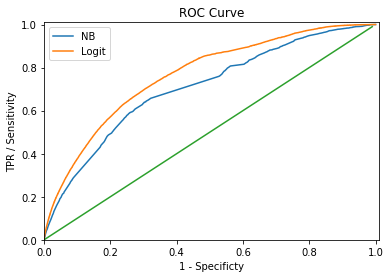

In [13]:
fpr_nb,tpr_nb,thr_nb = roc_curve(y_test, y_probs[0])
fpr_log,tpr_log,thr_log = roc_curve(y_test, y_probs[1])

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_nb,tpr_nb)
plt.plot(fpr_log,tpr_log)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['NB','Logit'])
plt.show()

In [14]:
print('AUC-NB=', auc(fpr_nb, tpr_nb))
print('AUC-Logit=', auc(fpr_log, tpr_log))

AUC-NB= 0.7060197509881057
AUC-Logit= 0.7644832099214628


## 2. Random Forest + AdaBoost

In [15]:
models = [RandomForestClassifier(class_weight='balanced'),AdaBoostClassifier(base_estimator=DecisionTreeClassifier())]

In [16]:
params = [{'n_estimators': st.randint(20,100), 
           'max_features': st.randint(5,12), 
           'max_depth': st.randint(5,20)},
          {"base_estimator__max_depth": st.randint(5,20),
           "base_estimator__min_samples_split": st.randint(5,15),
           "base_estimator__min_samples_leaf": st.randint(1,10),
           "base_estimator__max_features": st.randint(5, 12),
           "n_estimators": st.randint(20,200),
           "learning_rate": st.uniform(0.01, 1)
          }]

In [17]:
grids = []
i = 0
for i in range(len(models)):
    gs = RandomizedSearchCV(models[i], params[i], n_iter = 10, scoring='roc_auc', verbose= 10, n_jobs=-1, cv=3, random_state=1)
    print (gs)
    fit = gs.fit(X_train, y_train)
    grids.append(fit)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020D3D7726A0>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020D3D772358>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020D3D7729E8>},
          pre_dispatch='2*n_jobs', random_state=1, refit=True,
          return_train_score='warn', scoring='roc_auc', ve

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 22.5min remaining: 13.0min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 23.5min remaining:  7.1min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 27.3min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 29.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'base_estimator__max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020D3D772B70>, 'base_estimator__min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020D36F45EB8>, 'base_estimator__min_samples_leaf': <scipy.stats._distn_infra...B2898>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_fro

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 44.0min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 93.6min remaining: 54.2min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 96.5min remaining: 29.4min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 111.9min remaining: 12.4min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 112.9min finished


In [18]:
y_probs = []
for i in grids:
    print ("Mejor Modelo: ",i.best_estimator_)
    print ("AUC: ",i.best_score_)
    y_pred = i.predict(X_test)
    print ("Matriz de Confusión:\n",confusion_matrix(y_test, y_pred))
    print ("Accuracy: ",accuracy_score(y_test, y_pred))
    print ("Recall: ",recall_score(y_test, y_pred))
    print ("Precision: ",precision_score(y_test, y_pred),"\n")
    y_aux = i.predict_proba(X_test)
    y_probs.append(y_aux[:,1])

Mejor Modelo:  RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features=8,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)
AUC:  0.8152603270203712
Matriz de Confusión:
 [[409814 191696]
 [  4512  15351]]
Accuracy:  0.6842347511076278
Recall:  0.7728439812717112
Precision:  0.07414258598289278 

Mejor Modelo:  AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=9, min_weight_fraction_leaf=0.0,
            presort=False, random_state

In [19]:
joblib.dump(grids[0], './Modelos/Otros/Otros_RF.sav')
joblib.dump(grids[1], './Modelos/Otros/Otros_AB.sav')

['./Modelos/Otros/Otros_AB.sav']

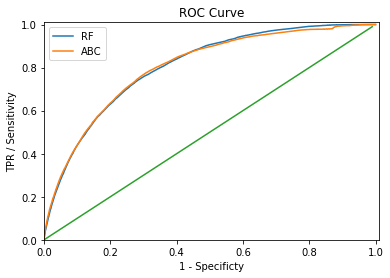

In [20]:
fpr_RF,tpr_RF,thr_RF = roc_curve(y_test, y_probs[0])
fpr_ABC,tpr_ABC,thr_ABC = roc_curve(y_test, y_probs[1])

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_RF,tpr_RF)
plt.plot(fpr_ABC,tpr_ABC)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['RF', 'ABC'])
plt.show()

In [21]:
print('AUC-RF=', auc(fpr_RF, tpr_RF))
print('AUC-ABC=', auc(fpr_ABC, tpr_ABC))

AUC-RF= 0.8044257757834145
AUC-ABC= 0.8023643890292232


## 3. XGBoost + LGBM

In [22]:
models = [XGBClassifier(nthreads=-1), lgb.LGBMClassifier()]

In [23]:
params = [{"n_estimators": st.randint(200,1000), # Number of boosted trees to fit.
            "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
            "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
            "colsample_bytree": st.beta(10, 1), #     Subsample ratio of columns when constructing each tree.
            "subsample": st.beta(10, 1),     # Subsample ratio of the training instance.
            "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
            'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
            "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
          },
         {"n_estimators": st.randint(200, 2000), # Number of boosted trees to fit.
            "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
            "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
            "colsample_bytree": st.beta(10, 1), #     Subsample ratio of columns when constructing each tree.
            "subsample": st.beta(10, 1),     # Subsample ratio of the training instance.
            "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
            'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
            "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
          }]

In [24]:
grids = []
i = 0
for i in range(len(models)):
    gs = RandomizedSearchCV(models[i], params[i], n_iter = 20, scoring='roc_auc', verbose= 10, n_jobs=-1, cv=3, random_state=1)
    print (gs)
    fit = gs.fit(X_train.astype('float32'), y_train.astype('float32'))
    grids.append(fit)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, nthreads=-1, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020D4867C400>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020D50074A58>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020D50074D30>, 'cols...50>, 'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020D5007CEF0>},
          pre_dispatch='2*n_jobs', random_st

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 66.1min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 101.9min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 146.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 202.9min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 254.2min
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed: 309.9min remaining: 47.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 325.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020D5007C588>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020D5007E160>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020D5007E5C0>, 'cols...D8>, 'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020D50098CC0>},
          pre_dispatc

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 26.9min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 38.0min
[Parallel(n_jobs=-1)]: Done  52 out of  60 | elapsed: 42.9min remaining:  6.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 52.5min finished


In [25]:
y_probs = []
for i in grids:
    print ("Mejor Modelo: ",i.best_estimator_)
    print ("AUC: ",i.best_score_)
    y_pred = i.predict(X_test.astype('float32'))
    print ("Matriz de Confusión:\n",confusion_matrix(y_test.astype('float32'), y_pred.astype('float32')))
    print ("Accuracy: ",accuracy_score(y_test.astype('float32'), y_pred.astype('float32')))
    print ("Recall: ",recall_score(y_test.astype('float32'), y_pred.astype('float32')))
    print ("Precision: ",precision_score(y_test.astype('float32'), y_pred.astype('float32')),"\n")
    y_aux = i.predict_proba(X_test.astype('float32'))
    y_probs.append(y_aux[:,1])

Mejor Modelo:  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9823695622619454, gamma=5.247993768704456,
       learning_rate=0.08344920181881049, max_delta_step=0, max_depth=9,
       min_child_weight=5.232562320001181, missing=None, n_estimators=618,
       n_jobs=1, nthread=None, nthreads=-1, objective='binary:logistic',
       random_state=0, reg_alpha=3.039301122097161, reg_lambda=1,
       scale_pos_weight=1, seed=None, silent=True,
       subsample=0.9188693663870571)
AUC:  0.8296287313574068
Matriz de Confusión:
 [[601402    108]
 [ 19744    119]]
Accuracy:  0.9680513958604574
Recall:  0.005991038614509389
Precision:  0.5242290748898678 

Mejor Modelo:  LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.9652824003636089, gamma=0.7425843335817761,
        importance_type='split', learning_rate=0.08816769943462477,
        max_depth=9, min_child_samples=20,
        min_child_weight=2.330729627082299, 

In [26]:
joblib.dump(grids[0], './Modelos/Otros/Otros_XGB.sav')
joblib.dump(grids[1], './Modelos/Otros/Otros_LGBM.sav')

['./Modelos/Otros/Otros_LGBM.sav']

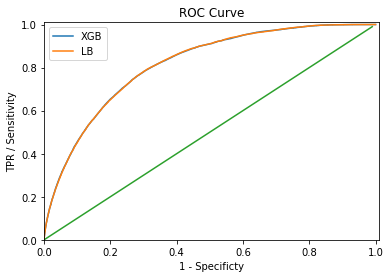

In [27]:
fpr_XGB,tpr_XGB,thr_XGB = roc_curve(y_test, y_probs[0])
fpr_LB,tpr_LB,thr_LB = roc_curve(y_test, y_probs[1])

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(fpr_XGB,tpr_XGB)
plt.plot(fpr_LB,tpr_LB)
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.legend(['XGB', 'LB'])
plt.show()

In [28]:
print('AUC-XGB=', auc(fpr_XGB, tpr_XGB))
print('AUC-LB=', auc(fpr_LB, tpr_LB))

AUC-XGB= 0.8146962868028834
AUC-LB= 0.8146865105623067
